In [1]:
# importing packages
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D
import matplotlib.pyplot as plt

import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import svm
print(tf.__version__)

2.6.0


In [2]:
# downloading dataset from keras
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images.shape

4431872/4422102 [==============================] - 0s 0us/step


(60000, 28, 28)

In [4]:
# setting class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

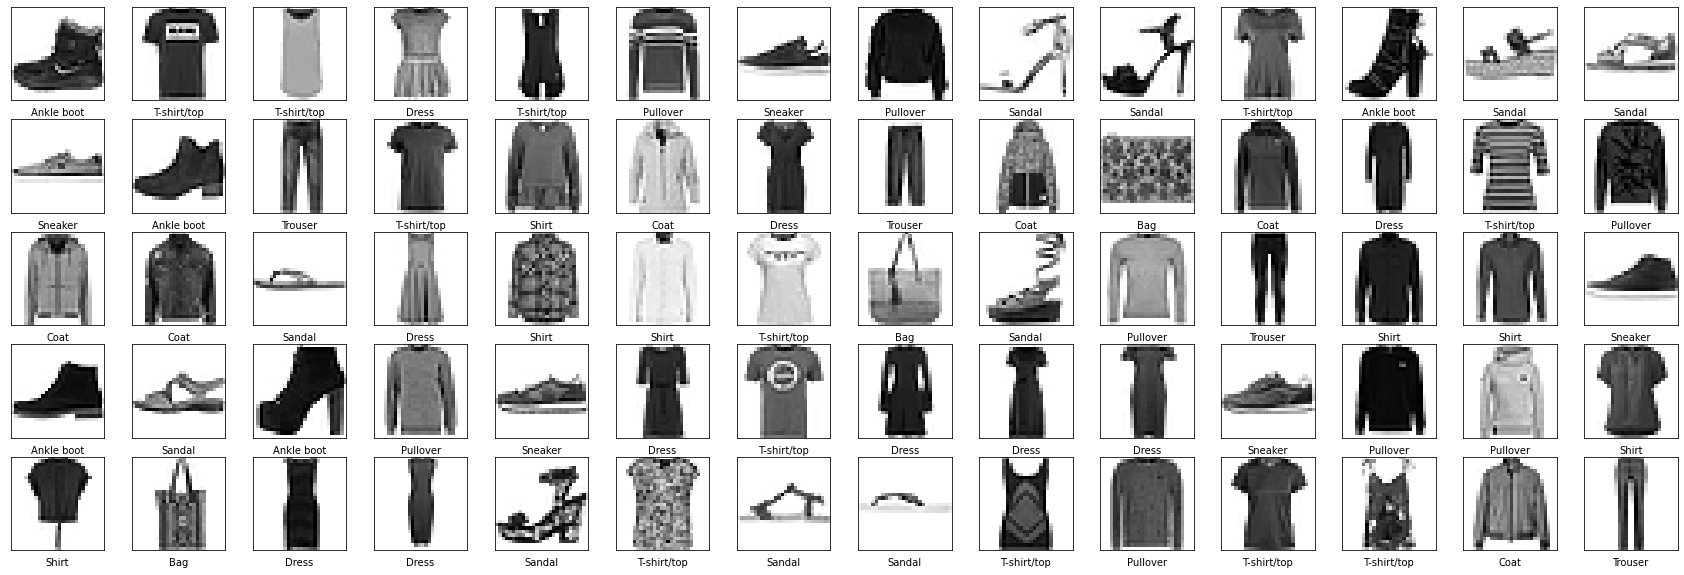

In [5]:
# review/plot the data using a loop to sample
plt.figure(figsize=(30,10))

for i in range(70):
    plt.subplot(5,14,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [6]:
# building the training set and showing the shape
x_train = np.expand_dims(train_images, 
                         axis=-1)
y_train = tf.keras.utils.to_categorical(train_labels, 
                                        num_classes=len(class_names))
x_train.shape

(60000, 28, 28, 1)

In [7]:
# building the keras model with 20 epochs
model = keras.Sequential([
    keras.layers.experimental.preprocessing.Rescaling(scale=1./255),
    
    tf.keras.layers.Conv2D(28, (3,3), activation='relu', input_shape=(28, 28, 1)),  
    tf.keras.layers.MaxPooling2D((2, 2)), 

    tf.keras.layers.Conv2D(56, (3,3), activation='relu'),  
    
    tf.keras.layers.Flatten(), 
     
    tf.keras.layers.Dense(64, activation='relu'),  
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 34s 18ms/step - loss: 0.4043 - accuracy: 0.8551
Epoch 2/20
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2642 - accuracy: 0.9045
Epoch 3/20
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2185 - accuracy: 0.9204
Epoch 4/20
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1867 - accuracy: 0.9308
Epoch 5/20
1875/1875 [==============================] - 37s 19ms/step - loss: 0.1553 - accuracy: 0.9424
Epoch 6/20
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1318 - accuracy: 0.9514
Epoch 7/20
1875/1875 [==============================] - 37s 19ms/step - loss: 0.1086 - accuracy: 0.9607
Epoch 8/20
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0910 - accuracy: 0.9662
Epoch 9/20
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0749 - accuracy: 0.9720
Epoch 10/20
1875/1875 [==============================] - 42s 22m

In [9]:
# print the test accuracy
x_test = np.expand_dims(train_images, 
                        axis = -1)
y_test = tf.keras.utils.to_categorical(train_labels, 
                                       num_classes=len(class_names))


test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

1875/1875 [==============================] - 10s 6ms/step - loss: 0.0283 - accuracy: 0.9894
Test accuracy: 0.9894000291824341
